# Week 5 - Fourier transforms

*The perhaps two most important takeaways from this lecture should be:*

1. *The fourier theorem states that **any** function can be represented as an infinite sum of complex exponentials:*
$$x(n) = \sum_{n = - \infty }^{+\infty}x(n) e^{-i \omega n}$$

2. *Euler's identity states that:*\

   a.  A complex exponential can be written as the sum of a cosine and a complex sine*
$$e^{i \theta} = \cos(\theta) + i \sin(\theta)$$
   b.  *Likewise, a cosine \or a sine function can be written as the following sums of complex exponentials*
$$\cos(\theta) = \frac{e^{i \theta} + e^{-i \theta}}{2}, \quad \sin(\theta) = \frac{i(e^{i \theta} - e^{-i \theta})}{2}$$

*Knowing these two things will get you through 99% of signal processing on a good day. Most of what this is used for in practical terms is the **fourier transform***

$$X(k) = \sum_{n = 0}^{N-1} x(n) e^{-i 2\pi \frac{kn}{N}} \quad \text{DFT (discrete case)}$$

$$X(k) = \int^N_{0} x(t) e^{-i 2\pi t} dt \quad \text{Continuous case (not used in this course)}$$

The (discrete) fourier transform can intuitively be understood in the following way:
1. We input some discrete function f(n) into the fourier transform
2. The values $X(k)$ we get out are amplitudes associated with sinusoidals of specific frequencies, needed to reconstruct the signal
   1. (Rough example): getting $X(1) = 3$ means that the amplitude associated with the freqeuncy $f_k = \frac{k}{N}f_s$ is $3$ where $N$ is the number of samples and $f_s$ is the sampling rate.  
3. Important to note: due to the symmetry of the fourier transform and the nyquist rate, if you have $N$ samples of a digital signal with a sampling rate of $f_s$, you will get $\frac{N}{2}$ different frequencies from the fourier transform, with half being positive frequencies and half being negative frequencies. Typically the postive ones are just removed from plots and such. Also the maximum frequency you will get from the fourier transform is $\frac{f_s}{2}$, so you are in a way automatically insured against aliasing.

## 1 - Fourier transform properties and examples

*This is just to give you a soft intro to how the damn thing actually works in discrete cases*



### Exercise 1.1

*You are given the following discrete signal values, sampled over a duration of $2$ seconds with a sample rate $f_s = 4$*

$$x(n) = [ 0,  1.21, -1,  0.21, 0, -0.21, 1, -1.21]$$

**1. What is the maximum frequency the fourier transform will be able to represent?**

According to the Nyquist rate, we have $f_{max} = \frac{f_s}{2} = \frac{4}{2} = 2$, in reality though, any signal with frequency at exactly $2$ will be seen only as 0's, so it is the technically the supremum of the set $f_k \in [0; 2[$.

**2. What are the specific *frequency bins*, meaning for any $X(k)$ (output from the fourier transform) what specific frequency will that fourier coeffcient correspond to for this specific case?**

ANSWER: Remember, we get the k'th frequency bin by calculating:

$$f_k = \frac{k}{N} \cdot f_s$$

So the specific values will be:

$$\mathbf{f} = [0, 0.5, 1, 1.5, 2]$$

Anything above here will be the negative frequencies, so the same frequencies in reality

**3. Calculate the fourier coefficient corresponding to k = 2**

ANSWER: Here we just use the formula above with the associated values, it is a bit of work though

$$X(2) = (0\cdot\frac{\exp(-(2\cdot 2\cdot i\cdot \pi)\cdot0}{8})) + 1.21\cdot\frac{\exp(-(2\cdot2\cdot i\cdot \pi)}{8}) - 1\cdot\frac{\exp(-(2\cdot2\cdot i\cdot \pi)\cdot2}{8}) + 0.21\cdot\frac{\exp(-(2\cdot2\cdot i\cdot \pi)\cdot 3}{8}) + 0\cdot\frac{\exp(-(2\cdot2\cdot i\cdot \pi)\cdot 4}{8}) - 0.21\cdot\frac{\exp(-(2\cdot2\cdot i\cdot pi)\cdot5}{8}) + 1\cdot\frac{\exp(-(2\cdot 2\cdot i \cdot \pi)\cdot6}{8}) - 1.21\cdot\frac{\exp(-(2\cdot2\cdot i \cdot \pi)\cdot 7}{8}))$$

$$ = 2$$

Which when we then normalize by the amount of samples gives us

$$X(2) = \frac{2}{8} = 0.25$$

And since we need to overlay positive and negative frequencies, we multiply by two:

$$0.25 \cdot 2  = 0.5$$

So we can say that the amplitude associated with the frequency $f_k =  \frac{k}{N} \cdot f_s = \frac{2}{8} \cdot 4 = 1$ is $0.5$ 

COPY this into maple if you just wanna see it there

bs(0*exp(-(2*2*I*Pi)*0/8) + 1.21*exp(-(2*2*I*Pi)/8) - exp(-(2*2*I*Pi)*2/8) + 0.21*exp(-(2*2*I*Pi)*3/8) + 0*exp(-(2*2*I*Pi)*4/8) - 0.21*exp(-(2*2*I*Pi)*5/8) + exp(-(2*2*I*Pi)*6/8) - 1.21*exp(-(2*2*I*Pi)*7/8))

Though you should really be using Python for this

In [146]:
import numpy as np 
from scipy.io.wavfile import read
from IPython.display import Audio
# import sounddevice as sd # Needed to play sounds - Only use if IPython.display.Audio does not work
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy.fft import fft, fftfreq # Technically used here is the fast fourier transform because it is... fast, don't convern yourself with this


In [147]:
def generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    wave = sum([amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t + phases[i]) for i in range(len(frequencies))])
    return wave

def calculate_fourier_coeffcients(signal_values, sample_rate=1, v=True):
    N = len(signal_values)
    coeffs = []

    # Calculate fourier coefficient for each frequency bin
    for k in range(N):
        # Create values to sum in order to obtain fourier coefficients
        prepared_to_sum = [x_n * np.exp(-2j * np.pi * k * n / N) for n, x_n in enumerate(signal_values)]
        coeffs.append(sum(prepared_to_sum) / N) # Divide by N to normalize frequency values
        
        if v:
            frequency = ((k / N) * sample_rate)
            absolute_coefficient = np.absolute(coeffs[k]) # Get absolute value to remove imaginary parts
            print(f"The fourier coeffcient associated with frequency {frequency}: {absolute_coefficient}")
            if k == N / 2:
                print("############ Frequencies Loop ############")

    return coeffs

### Exercise 1.2

*Far easier it is to create Python functions that calculate the fourier coeffcients for us*

**1. The first of the above two functions generate a sine wave based on a series on input amplitudes, phases, frequencies, sample rates and a duration of the signal. The second should calculate the fourier coefficients of said sine wave. Complete the function to calculate the fourier coefficients.**

**Test your imlpementation using the cell below, you shuold get back the amplitudes associated with each frequency**

**2. Change the values of the sample rate or frequency to see if you can make a signal whose frequencies cannot be accurately represented by the fourier transform**

**3. What do you think happens with the fourier coefficients when the signal contains a frequency that does not correspond to any of the frequency bins?**

In [148]:
frequencies = [0.5, 2]
amplitudes = [0.5, 1]
phases = [0, 0, 0]

sample_rate = 5
duration = 2

signal_values = generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration)
coeffs = calculate_fourier_coeffcients(signal_values, sample_rate=sample_rate, v=True)

The fourier coeffcient associated with frequency 0.0: 7.771561172376097e-17
The fourier coeffcient associated with frequency 0.5: 0.2500000000000001
The fourier coeffcient associated with frequency 1.0: 1.907678490446994e-16
The fourier coeffcient associated with frequency 1.5: 1.0190492755571724e-16
The fourier coeffcient associated with frequency 2.0: 0.49999999999999983
The fourier coeffcient associated with frequency 2.5: 2.590300575551817e-16
############ Frequencies Loop ############
The fourier coeffcient associated with frequency 3.0: 0.5
The fourier coeffcient associated with frequency 3.5: 7.917883021975843e-16
The fourier coeffcient associated with frequency 4.0: 1.7763568394002506e-16
The fourier coeffcient associated with frequency 4.5: 0.24999999999999967


### Exercise 1.3

*In practice, simply being above the nyquist rate isn't everything you need to get the lower frequencies. The amount of samples also has an effect*

**1. Take a look at the below code, the fourier coefficient for the frequency 0.25 has not been found. Why is this?**

**2. How can you change the values of sample_rate and duration to alleviate this problem?**

**3. What would you say is a general rule of sampling when you need to recover both very high and very low frequencies?**

POSSIBLE ANSWER (NOT NECESSARY THE CORRECT ONE):

It is obvious that we should have high sample rates to recover high frequencies, because of the Nyquist rate and all that. But to recover low frequencies, we must make sure to sample the signal long enough that we observe the whole period. If we for example sample with 44100Hz for 1 second, we get 44100 samples, which might seem like a lot, but since we only sample for 1 second, we cannot fully observe a signal with a frequency of 0.25, for example.       

In [158]:
frequencies = [0.25, 2]
amplitudes = [0.5, 1]
phases = [0, 0, 0]

sample_rate = 5
duration = 1

signal_values = generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration)
coeffs = calculate_fourier_coeffcients(signal_values, sample_rate=sample_rate, v=True)

The fourier coeffcient associated with frequency 0.0: 0.26568757573375223
The fourier coeffcient associated with frequency 1.0: 0.10474409892285991
The fourier coeffcient associated with frequency 2.0: 0.48686341261767146
The fourier coeffcient associated with frequency 3.0: 0.48686341261767135
The fourier coeffcient associated with frequency 4.0: 0.10474409892285991


## 2 - Properties of the fourier transform

*Two of the most touted properties of the fourier transform are arguably:*

1. It is linear, meaning $F(aX + bY) =  a\cdot F(X) + b \cdot F(Y)$
   1. This means, adding the scaled versions of signals in the time domain, equates to adding the scaled versions of their frequencies in the frequency domain
2. Convolutions in the time domain are multiplications in the frequency domain and vice versa, often written as  $f(x) * h(k) = F(X) \cdot H(X)$
   1. You need not know what this means specifically, but we will use it more next week

*We will just show the first in this exercise*

**$\star$ 1. Mathematically prove that the fourier transform (discrete case) is linear**

*Hint: Look at two different functions x and y, not different values of k*

ANSWER:

Here we start by writing up the condition of linearity:

$$F(ax + by)(k) \sum^{N-1}_{n = 0}(ax(n) + by(n)) e^{-i 2\pi \frac{kn}{N}}$$

We can then split up the sums:

$$= \sum^{N-1}_{n = 0}ax(n) e^{-i 2\pi \frac{kn}{N}} + \sum^{N-1}_{n = 0}by(n) e^{-i 2\pi \frac{kn}{N}}$$

Take the constants out

$$= a\sum^{N-1}_{n = 0}x(n) e^{-i 2\pi \frac{kn}{N}} + b\sum^{N-1}_{n = 0}y(n) e^{-i 2\pi \frac{kn}{N}}$$

And end up with what we sought

$$= aF(x)(k) + bF(y)(k)$$


**2. Show this condition of linearity by plotting what happens in the frequency domain when you add two scaled sine waves together. You can expand the cell below as a 'skeleton' for your code, or you can code it from scratch yourself**

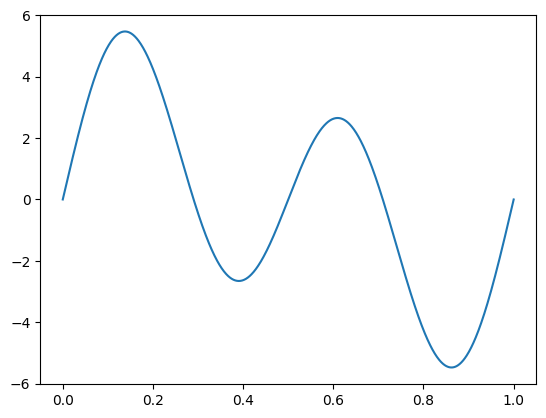

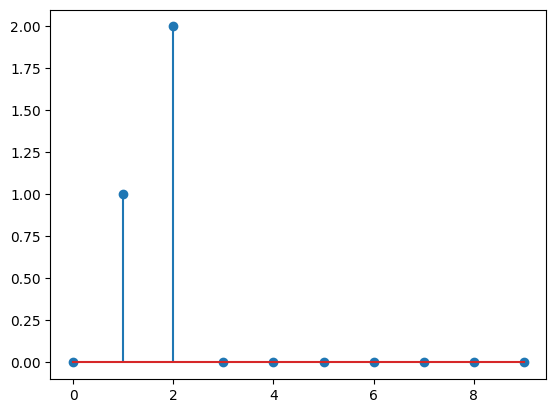

In [150]:
# Set duration of signal
duration = 1

# Set sample rate
sample_rate = 1000

# Create time values for signal
t = np.linspace(0, duration, int(sample_rate * duration))


# Define signals...
frequency_1 = 1
sine_wave_1 = np.sin(2 * np.pi * frequency_1 * t)

frequency_2 = 2
sine_wave_2 = np.sin(2 * np.pi * frequency_2 * t)

# Create linear combination of signals
a = 2
b = 4
signal_values = a*sine_wave_1 + b*sine_wave_2

# Get coefficients using previous fourier coefficients function
coeffs = np.abs(calculate_fourier_coeffcients(signal_values, sample_rate=sample_rate, v=False))


# Plot signal in time and frequency domain
plt.plot(t,signal_values)
plt.show()

plt.stem(coeffs[:10])
plt.show()

## 3 - Fourier transformations using packages

*As ML enthusiasts, we obviously never implement ourselves what the plebs have already done for us. In this case, scipy already has a rather good FFT implementation*

In [161]:
def sk_fourier_transform(time_signal, duration, sample_rate):
    """
    Use scipy to calculate the fft of a time signal
    """
    # Get the timesteps that the signal exists over
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    
    # Frequency domain (FFT)
    N = len(time_signal)
    yf = fft(time_signal) # Fourier coefficients
    xf = fftfreq(N, 1 / sample_rate) # Frequency values for the for the fourier coefficient bins
    
    return xf, yf, t


def plot_audio_signal(t, signal_time, signal_freq, signal_freq_bins, duration=None):
    """
    Plot a sine wave generated as as um of given frequencies, amplitudes and phases for a given duration with a givne sample rate

    Args:
        Same as play_sine_wave, lmao
        If duration is none, will automatically figure out duration from max frequency so you can actually see the frequencies
        This might lead to *some* aliasing in the plots themselves
    """
    # Create duration of signal if not already there
    if not duration:
        duration = 100 / max(frequencies)

    N = len(signal_time)
    
    # idx = np.arange(N // 2) # Complete to only take positive part of spectrum

    # Plot
    plt.figure(figsize=(12, 6))
    
    # Time domain plot
    plt.subplot(2, 1, 1)
    plt.plot(t, signal_time)
    plt.title("Audio signal in time domain")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Plot frequency domain
    plt.subplot(2, 1, 2)
    plt.stem(signal_freq_bins, (1.0 / N * np.abs(signal_freq)))  # Normalized magnitude
    plt.title("Audio signal in frequency domain")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


### Exercise 3.1 

*Using the FFT functions from scipy isn't actually **that** simple*

**1. Complete the sk_fourier_transform function to get the fourier coefficients (yf) and the fourier frequency bins (xf) from a given time signal. If you're having trouble, be sure to look up documentation or examples online for this. Test your implementation using the cell below.**

**$\star$ 2. Change the plot_audio_signal function to only plot the positive frequencies, and get the wholly correct value of the amplitudes.**

**3. Test the implementation in cases where there are frequencies that do not fit into frequency bins, and in cases were aliasing is present. How does the fourier spectrum look.**

POSSIBLE ANSWER: The frequencies that do not fit in should be distributed amongst the remaining frequencies. Visually this can seem as 'fat line' of frequencies that are all really really low.

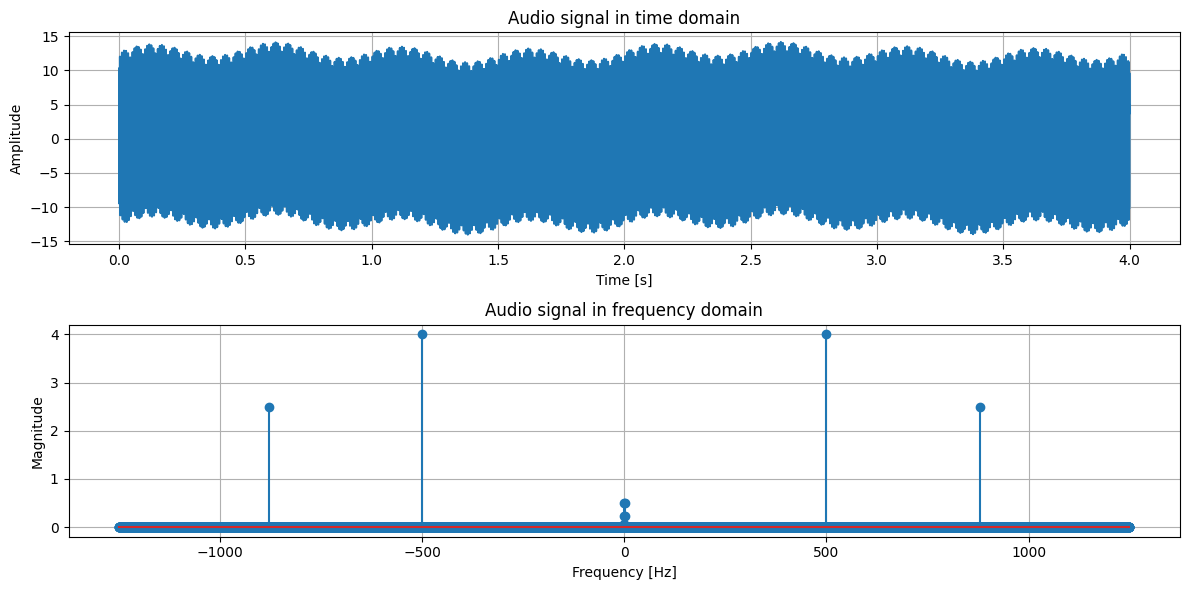

In [152]:
frequencies = [0.5, 2, 0.0005, 880, 7000]
amplitudes = [0.5, 1, 10, 5, 8]
phases = [0, 0, 0, 0, 0] 

sample_rate = 2500
duration = 4

time_signal = generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration)

xf, yf, t = sk_fourier_transform(time_signal, duration, sample_rate)

plot_audio_signal(t, time_signal, yf, xf, duration=duration)

### Exercise 3.2

*In real life, we never have noise-free observations, so it is useful to see how noise affects our final signal as well as the fourier spectrum. The below code introduces normal distributed noise to a given signal with the following, common model:*

$$y(n) = s_n + \eta_n  \text{ }|\text{ }  \eta_n \sim \mathcal{N}(0, \sigma)$$

*Where $s_n$ is our signal of interest, $\eta_n$ is the system noise and $y(n)$ is our observed signal*

**1. Complete the implementation to add noise to the observed time signal**

**2. How does the fourier spectrum change when noise is introduced? How are the noise 'frequencies' expressed. Why do you think this is the case?**

**POSSIBLE ANSWER** White noise is obviously completely different from timestep to timestep, so can appear as both very fast changes from one step to the next, or very slow moving tendencies. Really this means that it adds frequencies to the fourier spectrum that aren't really there. Really white noise is said to contain 'all frequencies'.

**3. Say you got an observed signal with noise as shown below, how could you approach removing the noise to only get the input frequencies out?**

POSSIBLE ANSWER: One (dreadfully simple) solution, is to just remove all frequencies with an amplitude below a certain level. The assumption here is that the signal of note is strong enough to cut through the noise. That means the "Signal to Noise ratio" is high. In situations where this is not the case, we typically need to know something about the statistics of the signal or the noise to say anything of a noised signal.

**3.1 Keeping in mind your idea for removing noise, how would increasing the variance of the noise impact this? Try increasing the variance of the noise and see what happens to the "noise frequencies" and the actual frequencies in the fourier spectrum**

POSSIBLE ANSWER: Increasing the variance of the noise means the noise has greater possibility of greater 'swings' at each timestep. Meaning the average impact on the signal will be higher. Thus more variance in the white noise, means we have a harder time discerning the actual signal. With amplitudes of around 2, and a noise variance of 4, the true signal already begins to wash out.

**$\star$ 3.2 The variance of the noise is often referred to as the "power" of the noise, why do you supose this is?**

POSSIBLE ANSWER: The **power** of a signal is considered as the average energy per time unit for a signal. In the discrete case, this is $P = \frac{1}{N}\sum^{N-1}_{n=0}|x(n)^2|$. For zero-mean white noise, this is exactly its variance, since $\text{Var}(n) = E[(n - E[n])^2]$ where we know that $E[n] = 0$ as it is zero-mean. Therefore the power of white noise is exactly its variance 

**$\star$ 4. Try changing the mean value of the noise from 0 to add a so called "DC component". What do you think this represents? How is it reflected in the fourier spectrum?**

POSSIBLE ANSWER: In this case, it would actually add an average value to the noise. Not one of note, since we could easily get rid of it if we knew it (and we can calculate it empirically quite easily!). It can come from a bunch of places if we have bad readings, or if we sample at exactly $2\cdot F$ for any frequency in our signal, it will appear as a DC component. Why it is called a DC component you need to ask more electrical engineering inclined people about.

It can be seen in the fourier spectrum as a spike at exactly 0

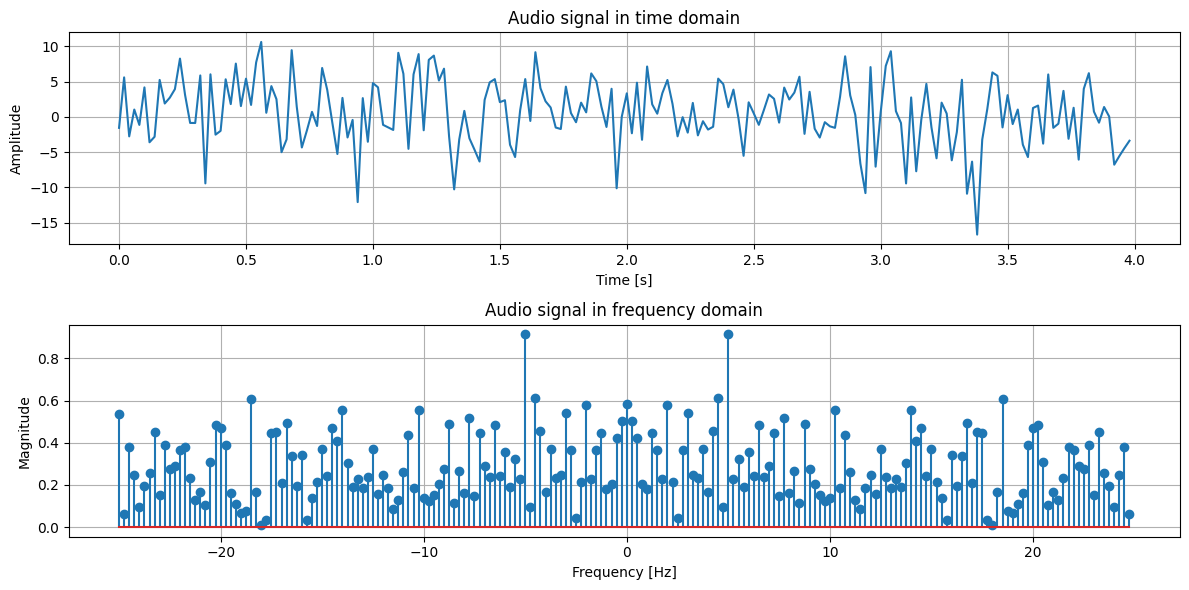

In [166]:
frequencies = [0.5, 2, 5]
amplitudes = [0.5, 1, 2]
phases = [0, 0, 0] 

sample_rate = 50
duration = 4

time_signal = generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration)

mean = 0 # Change this to introduce a 'dc component' to the noise
variance = 4 # Change this to increase the prescence of the noise

noise = np.random.normal(loc=mean, scale=variance, size=len(time_signal))       

noised_signal = time_signal + noise

xf, yf, t = sk_fourier_transform(noised_signal, duration, sample_rate)

plot_audio_signal(t, noised_signal, yf, xf, duration=duration)

### Exercise 3.3

*As previously mentioned, most of human speech is typically around the 90 - 3500 Hz range. It can be interesting to look at actual voice signals to see how they behave. The cell below loads one of four voice signals spelling out "S O F A"*

*We redefine fourier transform and plotting functions to work with loaded data*

1. *A clean signal where only the speech is present*
2. *A signal where white noise has been added in the background*
3. *A signal where non-white noise in the form of a fan has been added*
4. *A signal where non-white noise in the form of human speech has been added*

**1. Load the clean signal and see if you can recognize the difference between consonants and vowels in the time domain, what about the frequency domain?**

ANSWER: In general for speech, consonants will be a bit higher frequencies. This is especially a pain when dealing with filtering of speech signals, since consonants add a lot of meaning to speech, and are often the first to go if high-pass filters are applied

**2. Load the two different noised signals. How do the different types of noise stand out from one another?**

ANSWER: The talking noise is spread a lot more over the entire frequency domain, as opposed to the fan noise, which is almost entirely one frequency

**3. Play with the function mix_noise to mix different types of noise with the clean signal. What combinations of noise make the clean signal the most unintelligeble from an audio standpoint?**

POSSIBLE ANSWER: All of them. Looking after individual frequencies in signals in the time domain is typically a terrible idea, this is no different

**3.1 What combinations of noise make the clean signal the most unintelligeble when looking at just the plot of the time and frequency domain**

POSSIBLE ANSWER: The speech, no question. The fan noise could be filtered out extremely easily, by just removing the few frequencies it occupies. The white noise is more difficult, but we could use options discussed before, just removing low frequencies. The talking noise is far harder. Since it occupies the same frequency band as the signal (which is also talking), we cannot 'safely' remove the talking noise without possibly removing some of the signal.

This whole seperating different noise and signal types from one another is a whole can of worms called "source sepreation". If you want, you can read about a method called ICA (Independent Component Analysis), typically used for this purpose.

**4. In general, what types of the presented noise do you think are the most difficult to remove out when the clean signal is human speech?**

POSSIBLE ANSWER: In general, speech is hella hard to filter out. If you think about it, it makes sense. From a data and statistics viewpoint, "important" speech is almost exactly the same as "noise" speech. The only difference being perhaps the amplitude (which might not even be consistent), and the semantic content (which can be extremely difficult to deduce).

This field typically occupies the domain called "speech enhancement", which seeks to remove additive noise in speech signal to clarify them.

In [154]:
# Redefine fourier transform and plot functions because they don't really work when we have signals with set durations
def sk_fourier_transform(time_signal, t, sample_rate):
    """
    Use scipy to calculate the fft of a time signal
    """
    # Get the timesteps that the signal exists over
    t = np.linspace(0, time_signal.size / sample_rate, time_signal.size, endpoint=False)
    
    # Frequency domain (FFT)
    N = len(time_signal)
    yf = fft(time_signal) # Fourier coefficients
    xf = fftfreq(N, 1 / sample_rate) # Frequency values for the for the fourier coefficient bins
    
    return xf, yf, t


def plot_audio_signal(t, signal_time, signal_freq, signal_freq_bins, duration=None, max_freq=5000):
    """
    Plot a sine wave generated as as um of given frequencies, amplitudes and phases for a given duration with a givne sample rate

    Args:
        Same as play_sine_wave, lmao
        If duration is none, will automatically figure out duration from max frequency so you can actually see the frequencies
        This might lead to *some* aliasing in the plots themselves
    """
    # Create duration of signal if not already there
    if not duration:
        duration = 100 / max(frequencies)

    N = len(signal_time)
    
    idx = np.arange(N // 2) # Complete to only take positive part of spectrum

    if max_freq is not None and max_freq > 0:
        idx = idx[:max_freq]


    # Plot
    plt.figure(figsize=(12, 6))
    
    # Time domain plot
    plt.subplot(2, 1, 1)
    plt.plot(t, signal_time)
    plt.title("Audio signal in time domain")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Plot frequency domain
    plt.subplot(2, 1, 2)
    plt.plot(signal_freq_bins[idx], (2.0 / N * np.abs(signal_freq[idx])))  # Normalized magnitude
    plt.title("Audio signal in frequency domain")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

Sample rate is: 48000Hz
noise_examples/fan_noise.wav
noise_examples/talking.wav


/tmp/ipykernel_23268/2234154148.py:19: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _, noise_signal = read(noise_path)


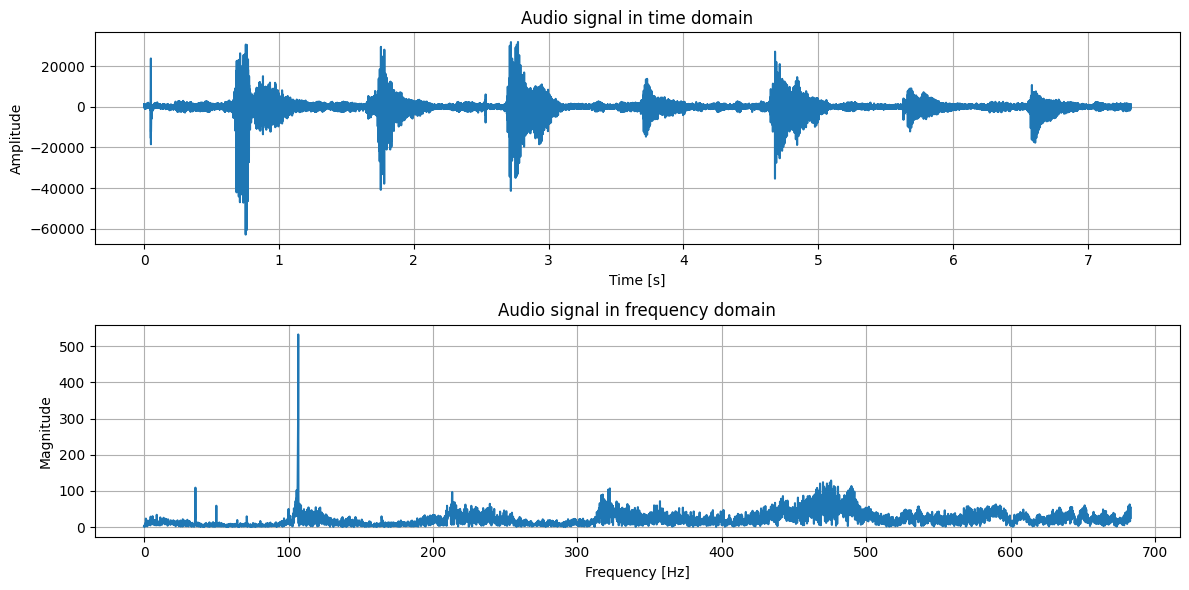

In [155]:
sofa_path = "audio/sofa.wav"
fan_noise_path = "noise_examples/fan_noise.wav"
talking_path = "noise_examples/talking.wav"

sample_rate, time_signal = read(sofa_path)
time_signal = 5 * np.array(time_signal[1:, 0],dtype=float)   # Indexed to make N odd


def mix_noise(observed_signal, noise_paths, noise_amplitudes, white_noise_variance=10, whtie_noise_mean=0, white_noise_amplitude=10):
    """
    Load and mix different white noise sources
    """
    for noise_path, noise_amplitude in zip(noise_paths, noise_amplitudes):
        print(noise_path)
        _, noise_signal = read(noise_path)
        noise_signal = np.array(noise_signal[1:, 0],dtype=float)[: len(observed_signal-1)]
        observed_signal += noise_signal * noise_amplitude

    # Create and add white noise
    white_noise = np.random.normal(loc=whtie_noise_mean, scale=white_noise_variance, size=len(time_signal))
    observed_signal += white_noise_amplitude * white_noise

    return observed_signal


print(f"Sample rate is: {sample_rate}Hz")

time_signal = mix_noise(time_signal, [fan_noise_path, talking_path], [0.05, 0.05])

# Create fourier transform, plot signal
xf, yf, t = sk_fourier_transform(time_signal, duration, sample_rate)
plot_audio_signal(t, time_signal, yf, xf, duration=duration, max_freq=5000)
Audio(time_signal,rate = sample_rate)



### Exercise 4 - Reflections on noise

*Noise is present everywhere, but can be circumvented in quite a few cases. The following questions are mostly discussion and reflection questions, there may not be a 'true answer'*

**1. Alice uses her phone to call Bob. Alice's phone signal occupies the frequency range 600MHz to 1GHz (somewhat normal for phones). Charlie is right next to Alice during her call, and is watching a Joe Rogan podcast using Wifi, which he recieves on the frequency band 2.4GHz to 5GHz.**

**1.1 Is the call between Alice and Bob in danger of being cut off? Why/Why not?**

ANSWER: No, not at all. Unlike humans, machines are not at all distracted by different frequencies, so long as all information is conatined within distinct bands. In this case, the phone call band of Alice does not touch the wifi band of Charlie. 

You can see it in sine waves as well. We can add two sine waves of two different frequencies, and still perfectly recover the original two sine waves. It is only when we mix frequencies, that it becomes a problem.

**1.2 Say Charlie *wants* to mess with Alice and Bob by interrupting their call. How could he go about this?**

POSSIBLE ANSWER: Charlie could find the biggest, baddest radio transciever he can get that functions in the same frequency band as Alice, hook it up to the biggest power source he can find, and then simply make a call to whomever. This would generate a signal in the same frequency range as Alice's call, but on a much higher amplitude. Charlie's "Noise" would therefore drown out Alice's call. This is often referred to as "Jamming", and is the signal equivalent of shouting right next to two people trying to have a conversation.

*Extra note*: Charlie would not be able to do this on the regular celluar network, since modern cellphones have **a heap** of technologies to prevent them from interfering with one another. This is why thousands of people can use their cellphones in the same place with little to no loss of quality. An example of such a technology is **channel multiplexing** and is quite interesting to read about if you have the time.

**2. Reflect on what can cause noise in the following scenarios:**

1. **Talking in a crowded room**
2. **A phone getting wifi signal in a crowded mall**
3. **An alien race sending a signal to earth so NASA can hear it.**

POSSIBLE ANSWERS:
1. Other people talking
2. The other people's phones
3. Pretty much everything in space. We don't know on what frequencies and channels aliens usually transmit, so everything from the light of stars to radiation from black holes can influence the signal as noise.

**3. You are an engineer working for the well-known and respected military contractor, Suckheed Fartin (Skibidi Gyattin). Recently, the military has been having issues where nasty people have used radios to send mean messages to the pilots of fighter jets flying missions, this of course makes the pilots very sad, and the military wants a solution.**

**How would you, armed with your newfound knowledge of signal processing, go about solving the issue of these mean messages. For practical purposes, the pilots cannot turn off their radios or change the reciever frequencies on their radios**

POSSIBLE ANSWER: I see two possible solutions:

1. Using an active-noise-cancelling type strategy. Given that the pilots have probably heard enough insults at this point to know what they say, the jet radios can simply transmit the exact same waves as the ruffians' but phase-shifted 90 degrees. When two opposite waves meet, they cancel out.
2. Transmitting their own nasty words on the same channel, so the pilots cannot recieve the simply drowning out the noise. This, however, has the downside of also hitting whomever else is in the general area, and in a way, equates to turning your radio off for all but the most powerful transmitters. 

Fun fact: In the real world, military jets do exactly number two. Usually with radar waves instead of radio waves to prevent radars from accurately pinpointing their location.

## $\star$ Exercise 5 - The Short-Time Fourier transform

*This is just to show what can also be done. There is something called the short time fourier transform (STFT). What this does is split a time signal into a bunch of smaller time intervals, and computes the fourier transform for each smaller interval. Laying all of these FT's in series produces what is known as a spectogram, which you may have already know from Intro to Intelligent systems*

**1. Why would you do this?**

The answer can vary, but the main reason is in use for signals where the frequency content can change quickly. Take for example human speech where the frequency content can change widely depending on what is being said.

Another example (that I am currently working on), is when you have a signal that has been filtered with an unknown signal and need to unfilter it. The STFT lets you amplify or attentuate frequencies on specific timesteps, rather than frequencies over the entire time domain. This lets you have much greater dergree of granularity when doing inverse problems such as that.


**2. How do you implement this?**

Shown below. You need a few more parameters that the regular FT, most of which determine how the different time segments overlap. The 'window' parameter is a kind of filter that determines how one or more time segments overlap, while the nperseg is how many time units is used for each segment. A larger number creates a more 'mean value' for each segment and has smoother transitions, as well as being faster, while a smaller value gives greater granularity in what the frequency content is at a specific timestep, but can vary more and is slower.

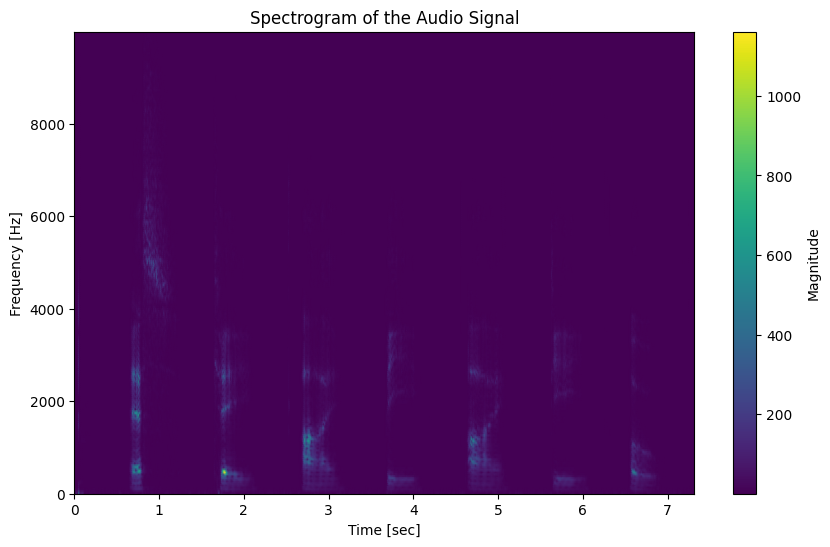

(array([ 0.,  0.,  0., ..., -1.,  1.,  0.]), 48000)

In [156]:
def load_file_and_plot_stft(file_path, max_freq=10000, audio=True, start_duration=None):
    sample_rate, time_signal = read(file_path)

    if start_duration:
        time_signal = time_signal[start_duration[0]*sample_rate: start_duration[0]*sample_rate +  start_duration[1]*sample_rate]

    # Pre-process time signal
    time_signal = np.array(time_signal[1:, 0], dtype=float)  # Indexed to make N odd

    # Perform STFT
    f, t, Zxx = stft(time_signal, fs=sample_rate, nperseg=1024,  window='hann')

    # Filter out the frequencies above the desired range
    freq_mask = f <= max_freq
    f_filtered = f[freq_mask]
    Zxx_filtered = Zxx[freq_mask, :]

    # Plot the spectrogram, here we use pcolormesh, since there is tehnically like three axes
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f_filtered, np.abs(Zxx_filtered), shading='gouraud')
    plt.title('Spectrogram of the Audio Signal')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Magnitude')
    plt.show()

    return time_signal, sample_rate



load_file_and_plot_stft('audio/sofa.wav')


**Having such a "clean" audio where there is almost no sound in many places is a big boring to look at, having for example a music clip might be more interesting...**

**Here is where the exercises end. If you want, I've collected a bunch of different examples of sound in the extra_spectograms folder that I think would be interesting to see both the spectogram of, if not also the fourier transform and the time domain signal. You can plot them using the below code if you want**

**Note, you can change the 'max_freq' if you want to see higher frequencies or want greater resolution on the lower frequencies.**

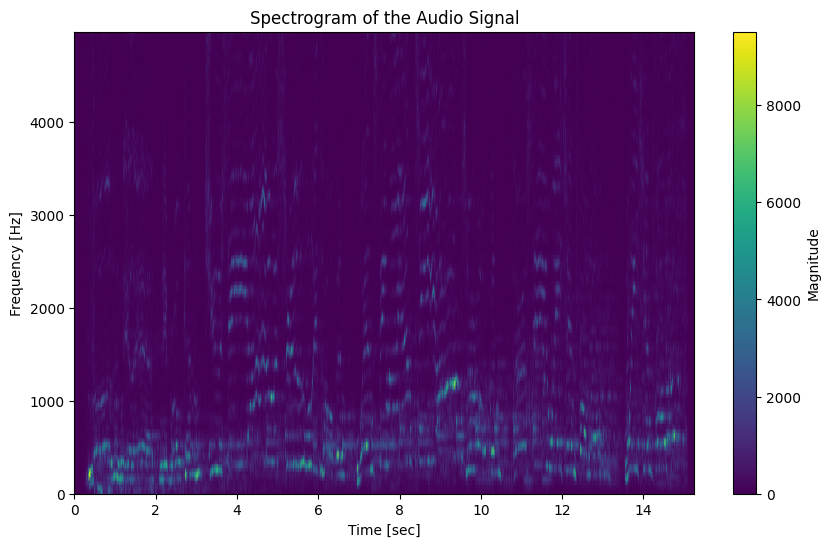

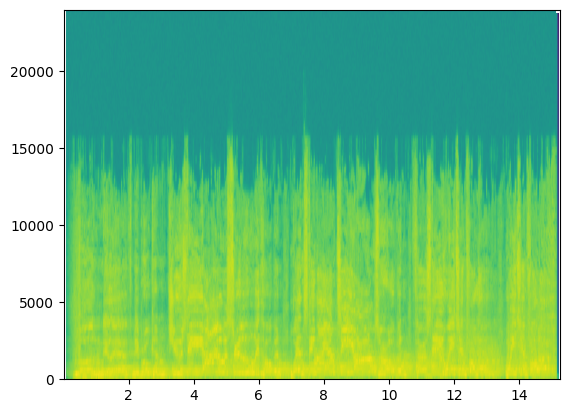

In [199]:
# Typical examples of young-people music
time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/good_music.wav", max_freq=5000, start_duration=[30, 15])
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/hutcher.wav", max_freq=5000)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/broken.wav", max_freq=5000)

# A bass singer (low pitch)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/bass_singer.wav", max_freq=5000)

# A tenor singer (high pitch)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/tenor_singer.wav", max_freq=5000)

# A guitar solo (medium pitch)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/guitar_solo.wav", max_freq=5000)

# A bass solo (low pitch)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/bass_solo.wav", max_freq=5000)

# A songbird (perhaps distortion)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/songbird.wav", max_freq=5000)

# A human songbird (????)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/human_songbird.wav", max_freq=5000)

# A bunch of people talking at the same time
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/people_talking.wav", max_freq=5000)



# An alternative way of plotting the spectogram, might be better, but does not contain correct frequencies since these are scaled by a different time unit
xf, yf, t = sk_fourier_transform(time_signal, duration, sample_rate)
plt.specgram(time_signal, Fs=sample_rate, NFFT=256, ) 
plt.show()

# If you want to play the audio
Audio(time_signal,rate = sample_rate)
